In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:,5] # 只使用房间数量这个特征用于简单线性回归

In [6]:
x.shape

(506,)

In [7]:
y = boston.target
y.shape

(506,)

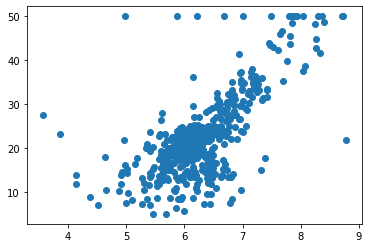

In [8]:
plt.scatter(x, y)
plt.show()

### 观察上述图发现在y = 50的点就是上界，可能问卷调查50或50以上都是归为50，这些点比较分散，可以将这些outlier删除掉。

In [9]:
np.max(y)

50.0

In [10]:
x = x[y < 50.0]
y = y[y < 50.0]

In [11]:
x.shape

(490,)

In [12]:
y.shape

(490,)

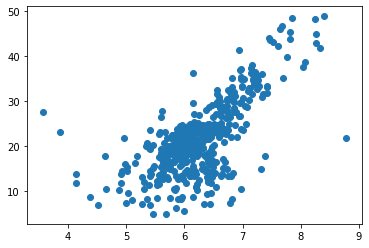

In [13]:
plt.scatter(x, y)
plt.show()

# 使用简单简单线性回归法-向量化

In [14]:
from PlayML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [15]:
x_train.shape

(392,)

In [16]:
x_test.shape

(98,)

In [18]:
from PlayML.SimpleLinearRegression import SimpleLinearRegression2

In [20]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

(7.8608543562689555, -27.459342806705543)

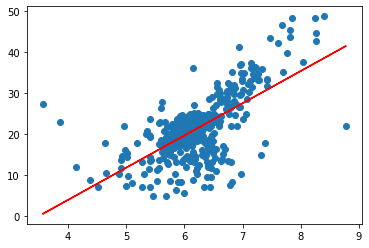

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

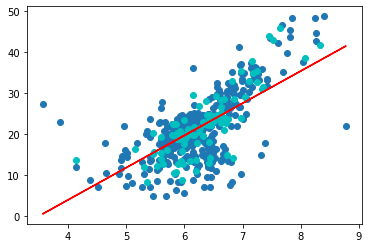

In [22]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [23]:
y_predict = reg.predict(x_test)

# MSE

In [24]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

24.156602134387438

# RMSE

In [25]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

# MAE

In [27]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

# 测试我们封装好的评测函数

In [28]:
from PlayML.metrics import mean_squared_error
from PlayML.metrics import root_mean_squared_error
from PlayML.metrics import mean_absolute_error

In [29]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [30]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [31]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

# sklearn中的MSE和MAE

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [33]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [34]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873